# plot Fig2c

## The pred labels have been saved when training methods 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from matplotlib import cm
from matplotlib.pyplot import MultipleLocator

In [37]:
def plot_sub(names, mat, title, ax):
    '''
       
    :param names:
    :param mat: 
    :param title:
    :param ax: 
    :return:
    '''
    weight = 'bold'
    sns.set()
    h = sns.heatmap(mat.round(2), annot=False, ax=ax, cmap="Blues", annot_kws={'size': 16}, cbar=False)  # 
    label_size=20
    tick_size=16
    ax.set_title(title, fontsize=label_size,fontweight=weight)  # 
    ax.set_xlabel('Predicted label', fontsize=label_size,fontweight=weight)  # 
    ax.set_ylabel('True label', fontsize=label_size,fontweight=weight)  # 
    ax.set_xticklabels(names, fontsize=tick_size, rotation=30,weight=weight, ha="right")  # 
    ax.set_yticklabels(names[::-1], fontsize=tick_size, rotation=0,weight=weight)  # 
    return h

In [38]:
def plot44(names, mat_list, title_list):
    '''
        
    :param names:
    :param mat_list
    :param title_list:
    :return:
    '''

    fig, axs = plt.subplots(2, 2,figsize=(16, 12))
    axs = axs.flatten()

    for i in range(4):
        ax = axs[i]
        plt.subplots_adjust(wspace=0.6, hspace=0.7)
        h = plot_sub(names, mat_list[i], title_list[i], ax)

    # 
    cb = fig.colorbar(h.collections[0], ax=[axs[0], axs[1], axs[2], axs[3]])  # 
    cb.ax.tick_params(labelsize=22)  # 

    plt.savefig('./figures/{}.png'.format('multiple_confuse'), format='png', dpi=400, bbox_inches='tight')
    plt.show()

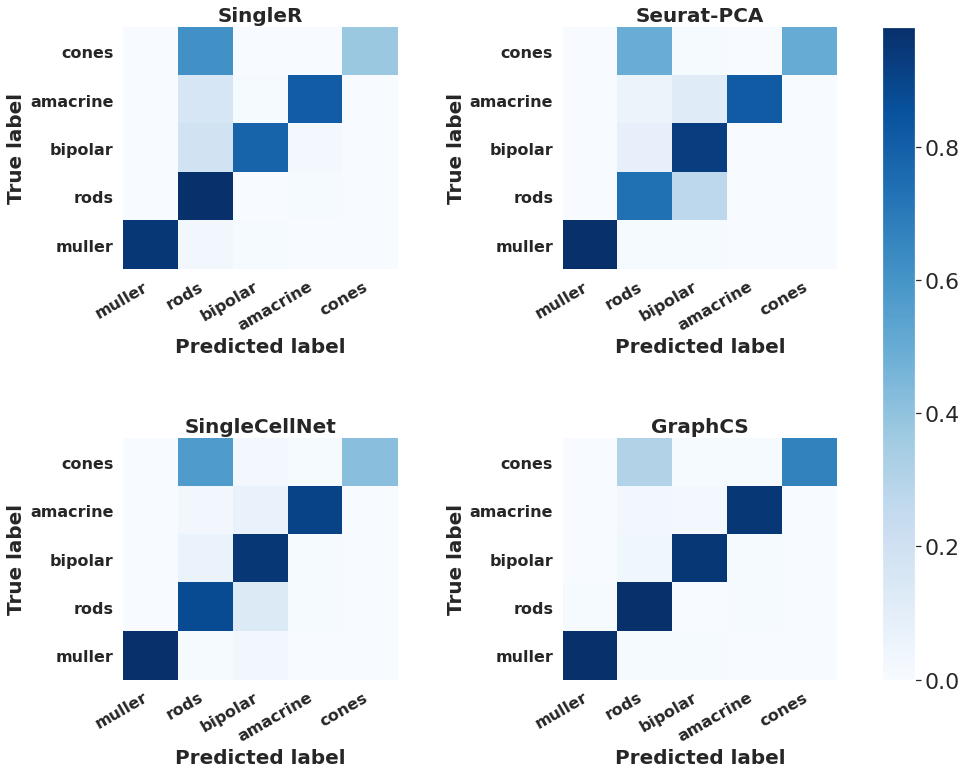

In [51]:
method=['SingleR','Seurat-PCA','SingleCellNet','GraphCS']
base='./competing_methods/pred_label_result/'
data=[base+i+'_mouse_retina.csv' for i in method]
mat=[pd.read_csv(data[i], header=0, index_col=None) for i in range(4)]
confused=[]
type=["muller", "rods", "bipolar", "amacrine", "cones"]
for i in mat:
    idx={type[-(k+1)]:k for k in range(len(type))}
    col={type[k]:k for k in range(len(type))}
    tmp=np.zeros((len(true_type),len(pred_type)),'float')
    for k in range(len(i)):
        tmp[idx[i['true_label'][k]]][col[i['pred_label'][k]]]+=1
    tmp/=(tmp.sum(1)+1e-9)[:,None]
    confused.append(tmp)
plot44(type, confused,method)

In [47]:
def plot43(true_type, pred_type, mat, title,annot=True):
    '''
          
    :param true_type:，
    :param pred_type:，
    :param mat: 
    :param title:
    :return:
    '''
    #plt.figure(figsize=(10, 10))
    sns.set()
    f, ax = plt.subplots()
    f.set_size_inches((len(pred_type),len(true_type)*0.8))
    
    h = sns.heatmap(mat, annot=annot, ax=ax, cmap="Blues", annot_kws={'size': 16}, cbar=False)  # 画热力图

    # 
    cb = h.figure.colorbar(h.collections[0])  # 
    cb.ax.tick_params(labelsize=18)  # 

    ax.set_title(title, fontsize=18)  # 
    ax.set_xlabel('Predicted label', fontsize=20)  # 
    ax.set_ylabel('True label', fontsize=20)  # 
    ax.set_xticklabels(pred_type, fontsize=16, rotation=45, ha="right")  # 
    ax.set_yticklabels(true_type, fontsize=16, rotation=0)  # 
    print(title)
    plt.savefig('./figures/{}_heatmap.png'.format(title), format='png', dpi=800, bbox_inches='tight')
    plt.show()

Seurat-CCA


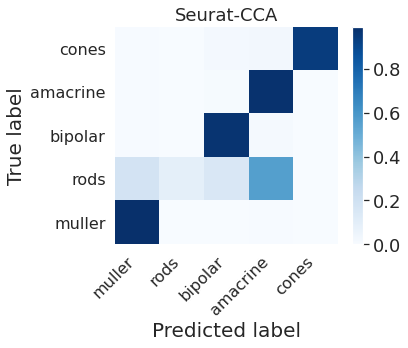

In [50]:
cls=["muller", "rods", "bipolar", "amacrine", "cones"]
method='Seurat-CCA'
base='./competing_methods/pred_label_result/'
mat=pd.read_csv(base+method+'_mouse_retina.csv', header=0, index_col=None)
idx={cls[-(k+1)]:k for k in range(len(cls))}
col={cls[k]:k for k in range(len(cls))}
confused=np.zeros((len(cls),len(cls)),'float')
for k in range(len(i)):
    confused[idx[mat['true_label'][k]]][col[mat['pred_label'][k]]]+=1
confused/=(confused.sum(1)+1e-9)[:,None]
plot43(cls[::-1],cls,confused,method,False)